# Tên đề tài: Phân tích dữ liệu bán hàng FMCG giai đoạn 2022–2024: Xu hướng tiêu dùng, khuyến mãi và tối ưu chuỗi cung ứng​
### Nhóm thực hiện: Nhóm 9
### Thành viên:
- Lê Thiên Trí - 24550046
- Đinh Hải Long - 24550026
- Ngô Nguyên Huy Luận - 24550029

# Mô tả bộ dữ liệu

### Đặt vấn đề
Ngành hàng tiêu dùng nhanh (FMCG – Fast Moving Consumer Goods) đặc trưng bởi nhu cầu mua bán thường xuyên, khối lượng lớn, biên lợi nhuận thấp nhưng xoay vòng nhanh. Việc phân tích dữ liệu bán hàng giúp doanh nghiệp:

- Hiểu xu hướng tiêu thụ theo thời gian (ngày, tháng, năm, mùa vụ).
- Đánh giá hiệu quả khuyến mãi: liệu promotion có thực sự thúc đẩy tiêu thụ không?
- Tối ưu tồn kho & giao hàng: cân bằng giữa stock, delivered quantity và nhu cầu bán thực tế.
- So sánh hiệu suất theo kênh bán hàng (Retail, Discount, Online) và theo vùng miền.
- Hỗ trợ dự báo nhu cầu (forecasting) để giảm thiểu tình trạng hết hàng hoặc dư thừa hàng tồn.

Nhóm chúng em chọn bộ dữ liệu này mục tiêu phân tích: Khai thác dữ liệu FMCG từ 2022–2024 để rút ra insight về hành vi tiêu dùng, mùa vụ, ảnh hưởng của khuyến mãi, và khả năng quản lý chuỗi cung ứng.

- Nguồn dữ liệu: https://www.kaggle.com/datasets/beatafaron/fmcg-daily-sales-data-to-2022-2024 (updated lần mới nhất là 2 tháng trước)
- Tác giả: Beata Faron

### Giới thiệu bộ dữ liệu


In [143]:
# Import thư viện
import pandas as pd
# Đọc dữ liệu
df = pd.read_csv('FMCG_2022_2024.csv')
df

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190752,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-North,Single,2.55,0,2,190,163,25
190753,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-South,Single,6.01,0,5,141,131,19
190754,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-Central,Single,3.45,0,5,0,132,0
190755,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-North,Multipack,1.93,1,2,211,201,40


In [144]:
# Hiển thị kiêuu dữ liệu
df.dtypes

date                object
sku                 object
brand               object
segment             object
category            object
channel             object
region              object
pack_type           object
price_unit         float64
promotion_flag       int64
delivery_days        int64
stock_available      int64
delivered_qty        int64
units_sold           int64
dtype: object

### Mô tả bộ dữ liệu
Bộ dữ liệu bao gồm các cột sau:
| No. | Tên thuộc tính       | Kiểu dữ liệu | Phạm vi / Giá trị   |
| --- | -------------------- | ------------ | ----------------------------------------|
| 1   | **date**             | object | 2022-01-01 → 2024-12-31 (ngày bán hàng, theo ngày)                                 |
| 2   | **sku**              | object | Mã SKU sản phẩm, ví dụ: *MI-006, BEV-012*                                          |
| 3   | **brand**            | object | Thương hiệu sản phẩm, ví dụ: *MiBrand1, BevBrand2*                                 |
| 4   | **segment**          | object | Phân khúc sản phẩm, ví dụ: *Milk-Seg3, Snack-Seg1*                                 |
| 5   | **category**         | object | Nhóm ngành hàng FMCG: *Milk, Beverages, Snacks, Household…*                        |
| 6   | **channel**          | object | Kênh bán hàng: *Retail, Discount, E-commerce*                                      |
| 7   | **region**           | object | Khu vực: *PL-Central, PL-North, PL-South*                                          |
| 8   | **pack_type**        | object  | Kiểu đóng gói: *Single, Multipack, Carton*                                         |
| 9   | **price_unit**       | float64 | Giá bán đơn vị, ví dụ: 1.5 → 15.0 (tăng dần qua năm, phản ánh xu hướng thị trường) |
| 10  | **promotion_flag**   | int64   | 0 = không khuyến mãi, 1 = có khuyến mãi                                            |
| 11  | **delivery_days**    | int64  | Số ngày giao hàng (lead time), ví dụ: 1 → 7                                        |
| 12  | **stock_available**  | int64  | Số lượng tồn kho sẵn có tại ngày đó (0 → vài trăm đơn vị)                          |
| 13  | **delivered_qty**    | int64  | Số lượng hàng được giao trong ngày (0 → vài trăm đơn vị)                           |
| 14  | **units_sold**       | int64   | Số lượng bán ra thực tế trong ngày (0 → vài chục đơn vị mỗi SKU/ngày)              |


Bộ dữ liệu bao gồm 190.757 bản ghi với 14 trường thông tin, ghi nhận các giao dịch bán hàng hằng ngày trong giai đoạn 2022–2024

***Các trường chính:***
- Thông tin sản phẩm: sku, brand, segment, category, pack_type
- Thị trường: channel (kênh bán), region (Khu vực)
- Giao dịch vận hành:
    - price_unit (giá bán lẻ)
    - promotion_flg (có khuyến mãi hay không)
    - delivery_days (số ngày giao hàng)
    - stock_available (tồn kho)
    - delivered_qty (số lượng giao hàng)
    - unit_sold (số lượng bán ra)

Ta thấy: Dataset này vừa chứa thông tin thị trường – sản phẩm, vừa có thời gian – vận hành – kết quả bán hàng, nên có thể phân tích đa chiều.

In [145]:
# Kiểm tra giá trị thiếu
print(df.isnull().sum())


date               0
sku                0
brand              0
segment            0
category           0
channel            0
region             0
pack_type          0
price_unit         0
promotion_flag     0
delivery_days      0
stock_available    0
delivered_qty      0
units_sold         0
dtype: int64


In [146]:
# Định dạng dư liệu
df["date"] = pd.to_datetime(df["date"]) # parse ngày

# các cột phân loại
categorical_cols = ["sku", "brand", "segment", "category", "channel", "region", "pack_type", "promotion_flag"]
for col in categorical_cols:
    df[col] = df[col].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190757 entries, 0 to 190756
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             190757 non-null  datetime64[ns]
 1   sku              190757 non-null  category      
 2   brand            190757 non-null  category      
 3   segment          190757 non-null  category      
 4   category         190757 non-null  category      
 5   channel          190757 non-null  category      
 6   region           190757 non-null  category      
 7   pack_type        190757 non-null  category      
 8   price_unit       190757 non-null  float64       
 9   promotion_flag   190757 non-null  category      
 10  delivery_days    190757 non-null  int64         
 11  stock_available  190757 non-null  int64         
 12  delivered_qty    190757 non-null  int64         
 13  units_sold       190757 non-null  int64         
dtypes: category(8), date

In [147]:
# chuẩn hóa dữ liệu (z-score normalization)
from scipy import stats
cols = ["delivery_days", "stock_available", "delivered_qty", "units_sold"]

df_z = df.copy()
df_z[cols] = stats.zscore(df[cols])

df_z[cols].describe()


,delivery_days,stock_available,delivered_qty,units_sold
count,1.907570e+05,1.907570e+05,1.907570e+05,1.907570e+05
mean,-1.698535e-17,1.039980e-16,-5.602186e-17,-7.628509e-17
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-1.417240e+00,-3.217873e+00,-4.753900e+00,-3.816443e+00
25%,-7.103378e-01,-6.389881e-01,-6.827036e-01,-6.728699e-01
50%,-3.435253e-03,-5.115393e-02,-8.333586e-03,-1.631013e-01
75%,7.034673e-01,6.504545e-01,6.660364e-01,4.316288e-01
max,1.410370e+00,4.689444e+00,4.662303e+00,1.011723e+01


In [148]:
# chia price_unit thành các nhóm giá bán đơn vị: thấp, trung bình, cao
import numpy as np
bins = np.linspace(min(df['price_unit']), max(df['price_unit']), 4)
group_name = ['Low', 'Medium', 'High']
df['price_category'] = pd.cut(df['price_unit'], bins=bins, labels=group_name, include_lowest=True)
df[['price_category', 'price_unit']].head()

,price_category,price_unit
0,Low,2.38
1,Low,1.55
2,Low,4.00
3,Medium,5.16
4,High,7.66


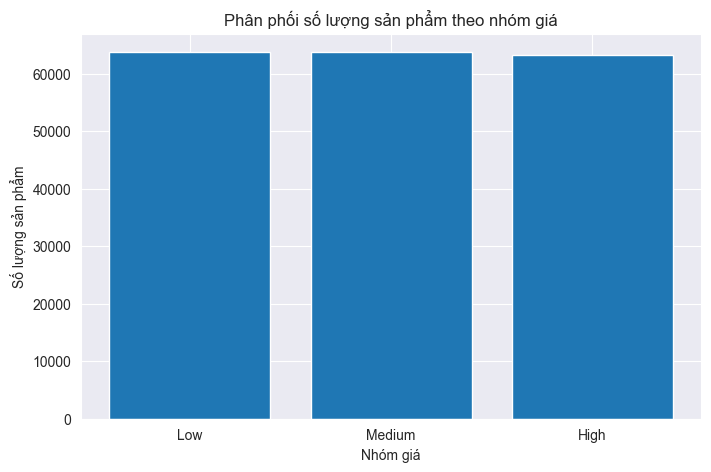

In [149]:
# Trực quan hóa phân phối giá theo nhóm
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
plt.bar(group_name, df['price_category'].value_counts())
plt.title('Phân phối số lượng sản phẩm theo nhóm giá')
plt.xlabel('Nhóm giá')
plt.ylabel('Số lượng sản phẩm')
plt.show()

In [150]:
# chia delivery_days thành các nhóm giao hàng: nhanh, trung bình, chậ
delivery_days_bins = np.linspace(min(df['delivery_days']), max(df['delivery_days']), 4)
df['delivery_speed'] = pd.cut(df['delivery_days'], bins=delivery_days_bins, labels=['Fast', 'Normal', 'Slow'], include_lowest=True)

df[['delivery_days', 'delivery_speed']]

,delivery_days,delivery_speed
0,1,Fast
1,3,Normal
2,5,Slow
3,2,Fast
4,4,Slow
...,...,...
190752,2,Fast
190753,5,Slow
190754,5,Slow
190755,2,Fast


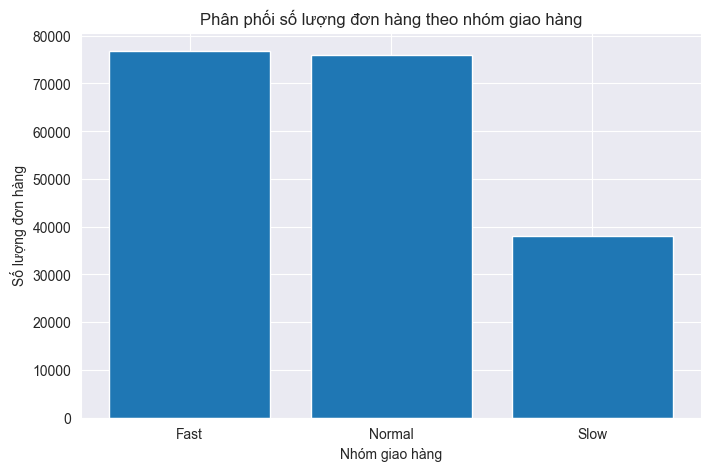

In [151]:
# Trực quan hóa phân phối giao hàng theo nhóm
plt.figure(figsize=(8, 5))
plt.bar(['Fast', 'Normal', 'Slow'], df['delivery_speed'].value_counts())
plt.title('Phân phối số lượng đơn hàng theo nhóm giao hàng')
plt.xlabel('Nhóm giao hàng')
plt.ylabel('Số lượng đơn hàng')
plt.show()

##### Kết quả: Ta thấy đa số đơn hàng giao hàng nhanh (1-3 ngày), ít đơn giao chậm (5-7 ngày)

In [152]:
# chuyển dữ liệu phân loại: one-hot encoding, biến pack_type
df_encoded = pd.get_dummies(df, columns=['pack_type'], drop_first=True)
df_encoded.head()

,date,sku,brand,segment,category,channel,region,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold,price_category,delivery_speed,pack_type_Multipack,pack_type_Single
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,2.38,0,1,141,128,9,Low,Fast,True,False
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,1.55,1,3,0,129,0,Low,Normal,False,True
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,4.00,0,5,118,161,8,Low,Slow,False,False
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,5.16,0,2,81,114,7,Medium,Fast,False,True
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,7.66,0,4,148,204,12,High,Slow,False,True


### Thăm dò dữ liệu

In [153]:
numeric_cols = ["price_unit", "delivery_days", "stock_available", "delivered_qty", "units_sold"]
import matplotlib.pyplot as plt
df["date"] = pd.to_datetime(df["date"], errors="coerce")
stats_numeric = df[numeric_cols].agg(["mean", "median", "min", "max", "std"]).T
print("📊 Thống kê mô tả dữ liệu số:")
stats_numeric

📊 Thống kê mô tả dữ liệu số:


,mean,median,min,max,std
price_unit,5.251979,5.25,1.5,9.0,2.166705
delivery_days,3.004860,3.00,1.0,5.0,1.414626
stock_available,157.697652,155.00,-12.0,405.0,52.736104
delivered_qty,179.333655,179.00,-11.0,366.0,40.037475
units_sold,19.919709,18.00,-25.0,139.0,11.770077


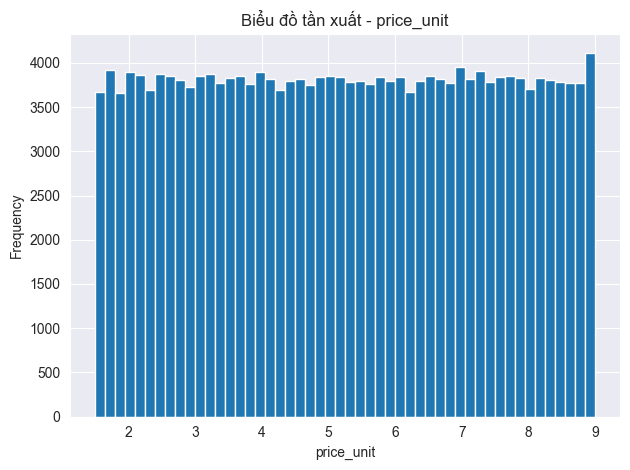

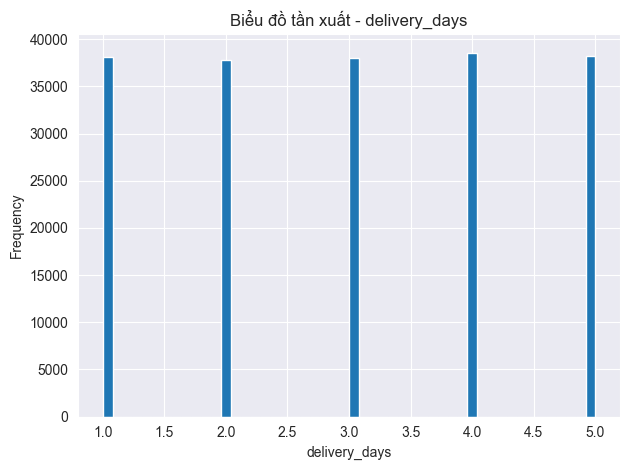

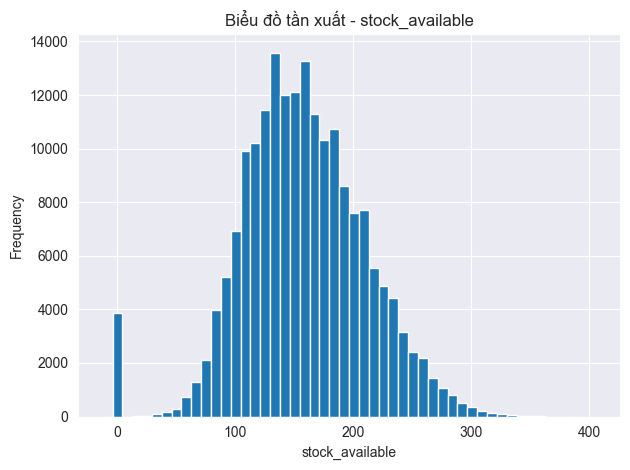

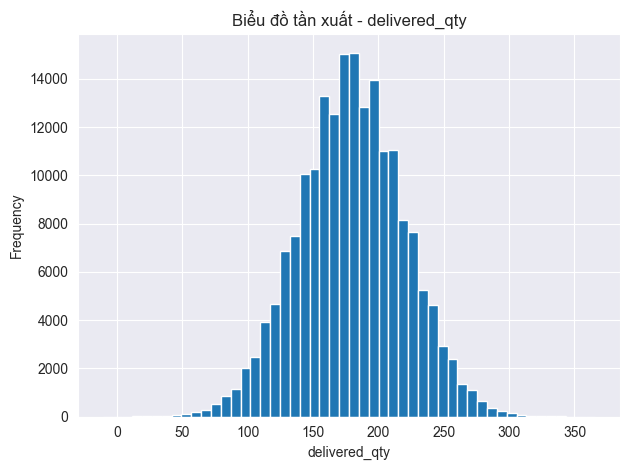

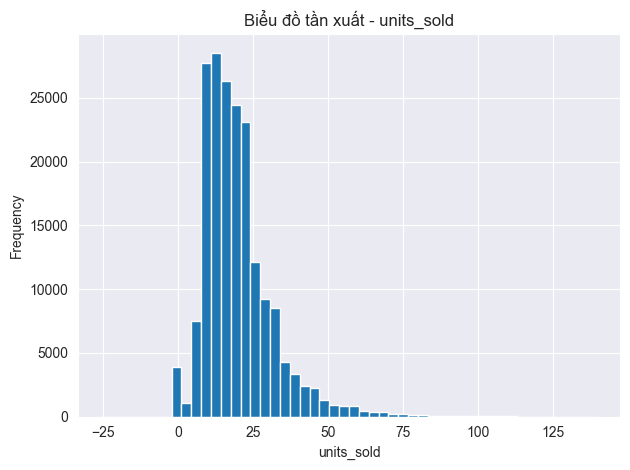

In [154]:
# Biểu đồ tần xuất (histogram) cho các biến số
for col in numeric_cols:
    plt.figure()
    df[col].plot(kind="hist", bins=50, title=f"Biểu đồ tần xuất - {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

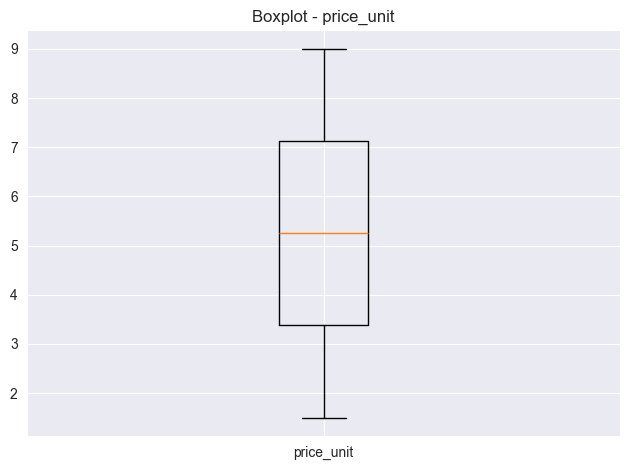

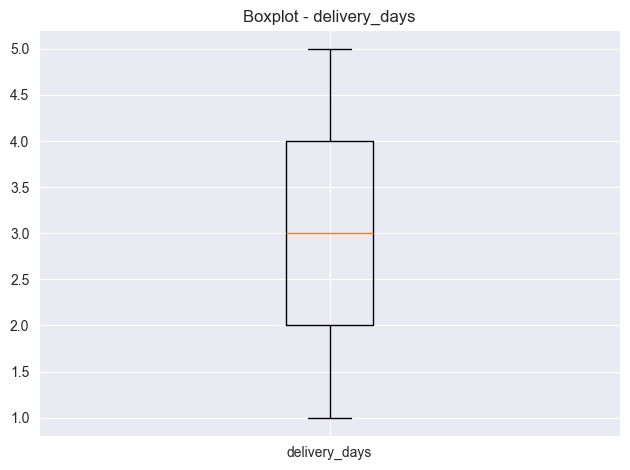

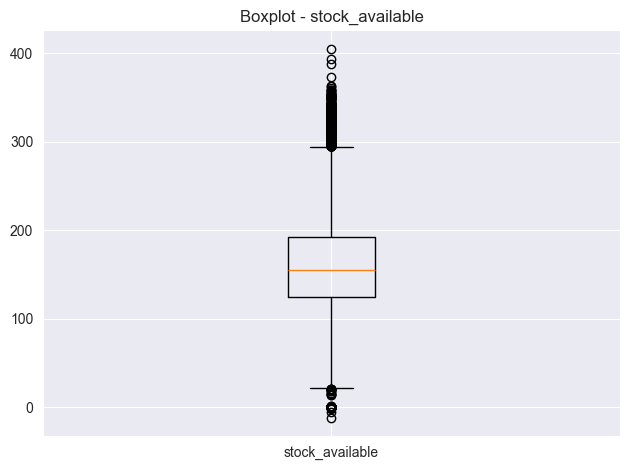

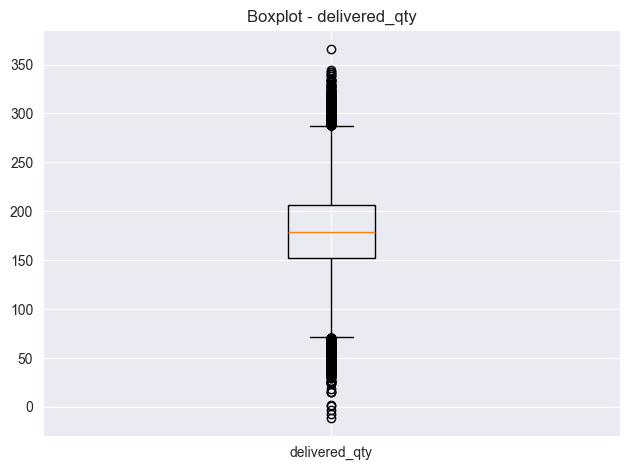

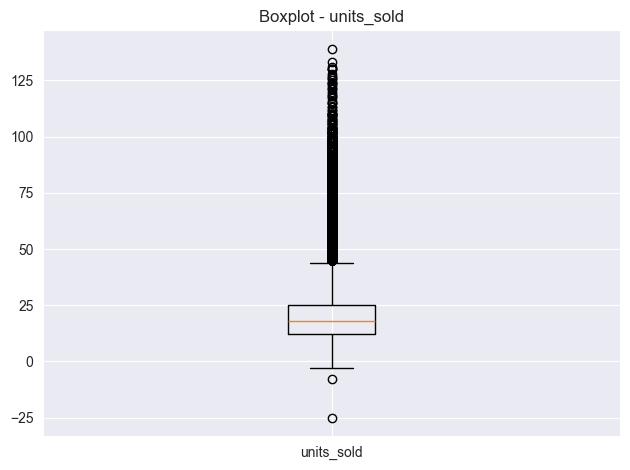

In [155]:
# Boxplot để phát hiện ngoại lệ
for col in numeric_cols:
    plt.figure()
    plt.boxplot(df[col].dropna(), vert=True, tick_labels=[col])
    plt.title(f"Boxplot - {col}")
    plt.tight_layout()
    plt.show()


🔹 Top 5 giá trị cho brand:
brand
SnBrand2    26775
YoBrand4    22317
YoBrand3    18981
MiBrand3    18228
YoBrand2    17349
Name: count, dtype: int64


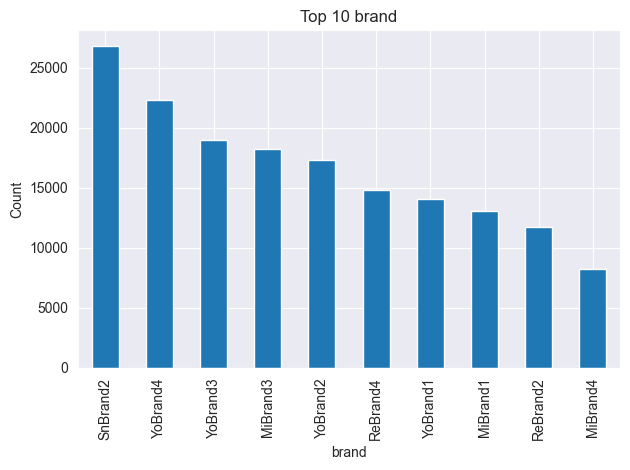


🔹 Top 5 giá trị cho region:
region
PL-North      63645
PL-South      63567
PL-Central    63545
Name: count, dtype: int64


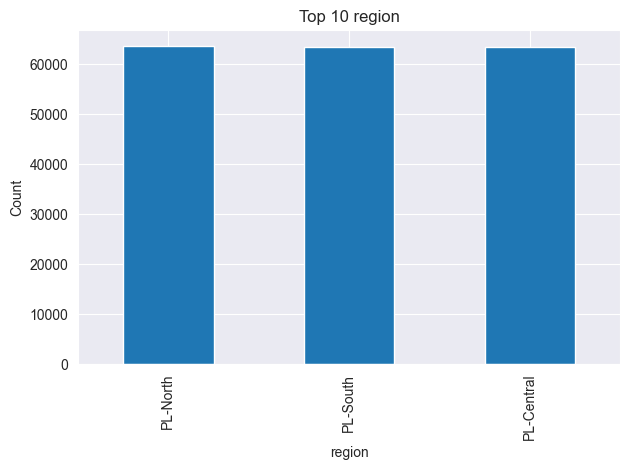


🔹 Top 5 giá trị cho channel:
channel
Retail        63688
E-commerce    63619
Discount      63450
Name: count, dtype: int64


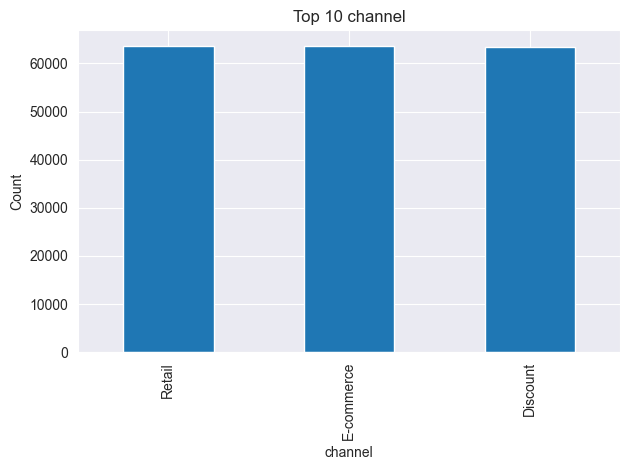

In [156]:
cat_cols = ["brand", "region", "channel"]

for col in cat_cols:
    print(f"\n🔹 Top {5} giá trị cho {col}:")
    print(df[col].value_counts().head(5))

    # Vẽ bar chart tần suất
    plt.figure()
    df[col].value_counts().head(10).plot(kind="bar", title=f"Top 10 {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


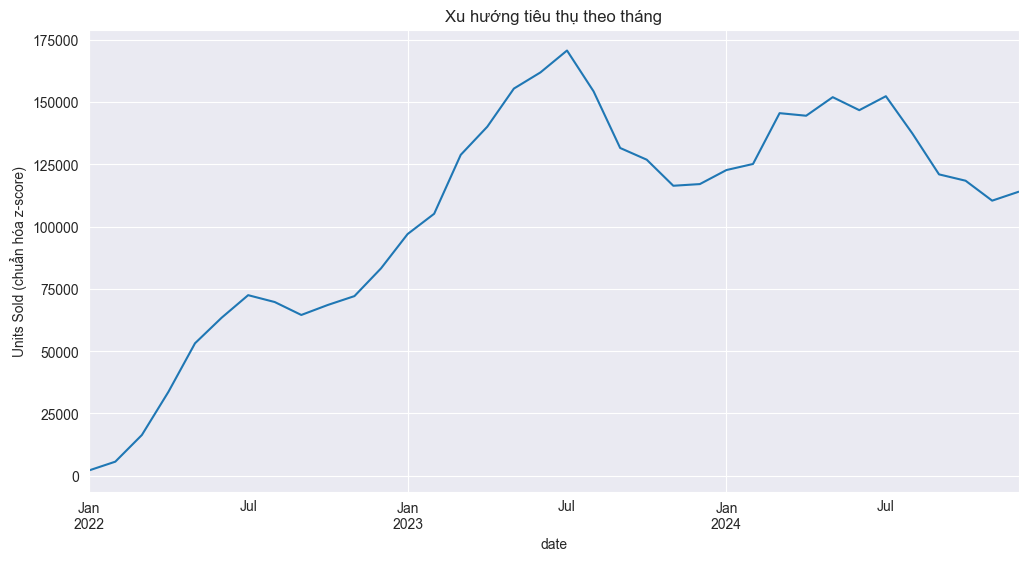

Mean: 105550.66666666667
Median: 117730.5


In [157]:
# Nhóm theo tháng để xem xu hướng units_sold
df['date'] = pd.to_datetime(df['date'])
sales_by_month = df.groupby(df['date'].dt.to_period('M'))['units_sold'].sum()

sales_by_month.plot(kind='line', figsize=(12,6))
plt.title("Xu hướng tiêu thụ theo tháng")
plt.ylabel("Units Sold (chuẩn hóa z-score)")
plt.show()

# Central tendency: trung bình & median tiêu thụ mỗi tháng
print("Mean:", sales_by_month.mean())
print("Median:", sales_by_month.median())

##### Kết quả: Cho ta thấy xu hướng tiêu thụ tăng dần theo thời gian với tháng/năm tăng cao nhất là jul-2023

                   count       mean        std   min   25%   50%   75%    max
promotion_flag                                                               
0               162296.0  17.439900   8.442057  -8.0  12.0  16.0  22.0   86.0
1                28461.0  34.060574  16.943774 -25.0  22.0  31.0  43.0  139.0


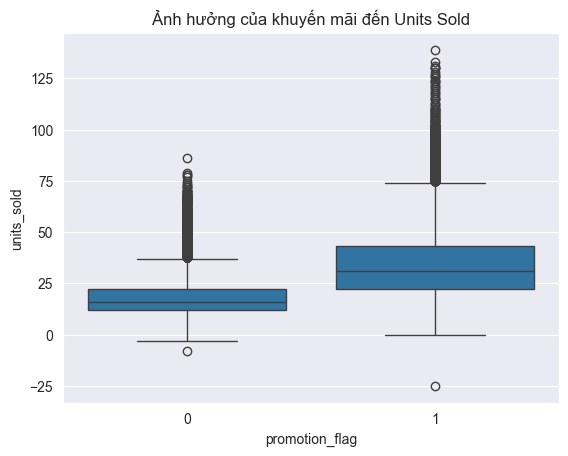

In [158]:
# So sánh units_sold khi có và không có promotion
promo_vs_non = df.groupby('promotion_flag', observed=False)['units_sold'].describe()
print(promo_vs_non)

sns.boxplot(x='promotion_flag', y='units_sold', data=df)
plt.title("Ảnh hưởng của khuyến mãi đến Units Sold")
plt.show()

In [159]:
#  Hệ số tương quan giữa hàng tồn kho, hàng đã giao, hàng đã bán
corr_sub = df[['stock_available','delivered_qty','units_sold']].corr()
print(corr_sub)

                 stock_available  delivered_qty  units_sold
stock_available         1.000000       0.668957    0.580335
delivered_qty           0.668957       1.000000    0.389198
units_sold              0.580335       0.389198    1.000000


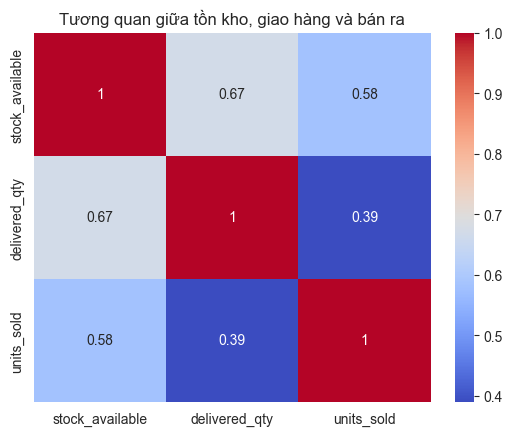

In [160]:
sns.heatmap(corr_sub, annot=True, cmap="coolwarm")
plt.title("Tương quan giữa tồn kho, giao hàng và bán ra")
plt.show()

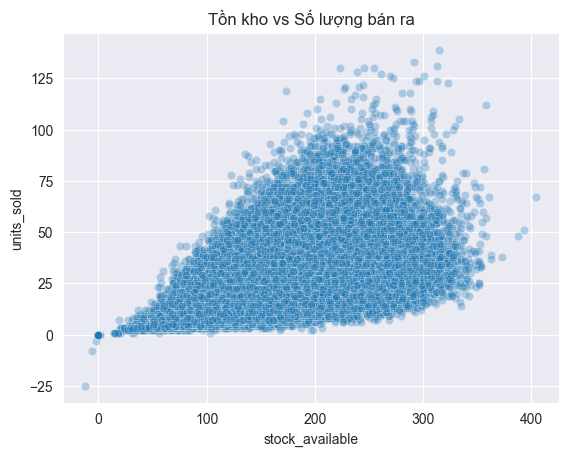

In [161]:
# Scatter plot để xem mối quan hệ
sns.scatterplot(x='stock_available', y='units_sold', data=df, alpha=0.3)
plt.title("Tồn kho vs Số lượng bán ra")
plt.show()

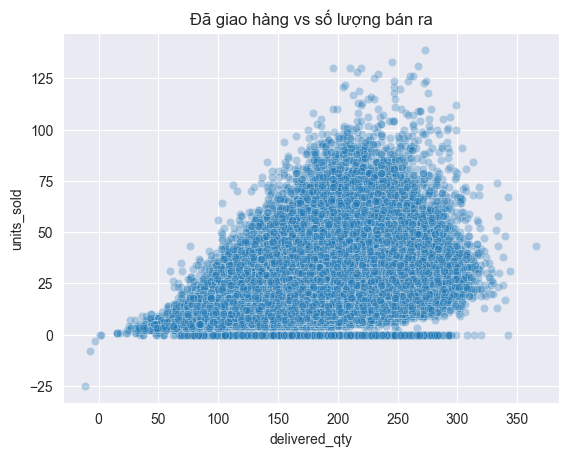

In [162]:
sns.scatterplot(x='delivered_qty', y='units_sold', data=df, alpha=0.3)
plt.title("Đã giao hàng vs số lượng bán ra")
plt.show()

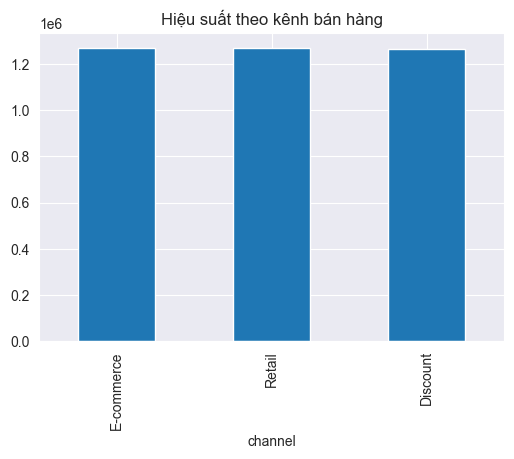

In [163]:
# So sánh hiệu suất theo kênh bán hàng và vùng miền
# Theo kênh bán hàng
channel_perf = df.groupby('channel', observed=False)['units_sold'].sum().sort_values(ascending=False)
channel_perf.plot(kind='bar', figsize=(6,4))
plt.title("Hiệu suất theo kênh bán hàng")
plt.show()

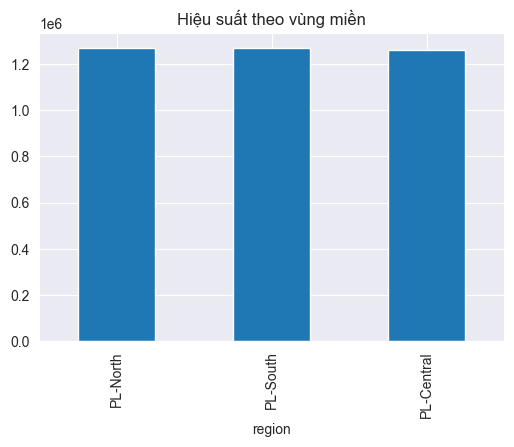

In [164]:
# theo khu vực
region_perf = df.groupby('region', observed=False)['units_sold'].sum().sort_values(ascending=False)
region_perf.plot(kind='bar', figsize=(6,4))
plt.title("Hiệu suất theo vùng miền")
plt.show()

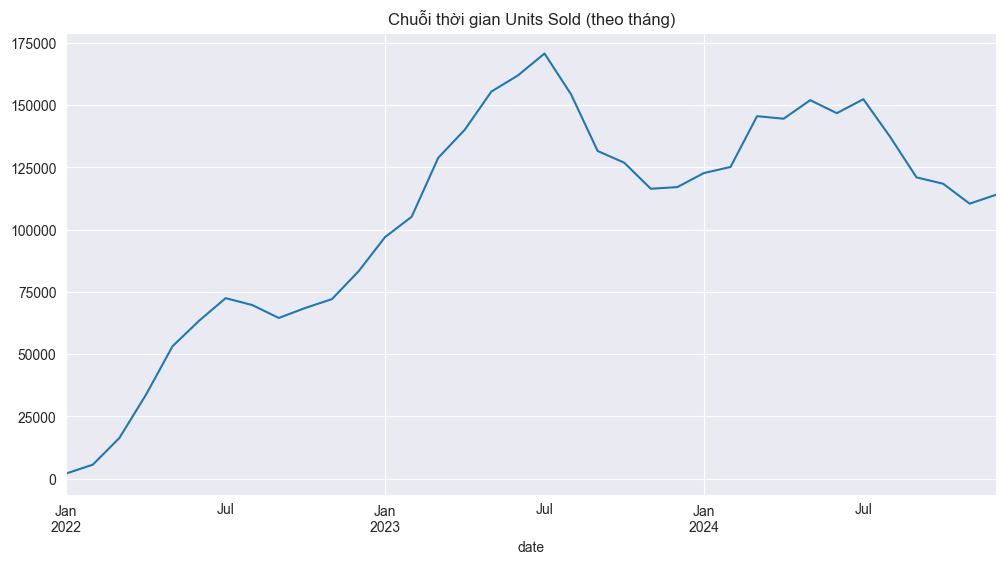

Skewness: -0.7857860097495647
Kurtosis: -0.20601736774963486


In [165]:
# Chuẩn bị series theo thời gian để dùng trong forecasting
ts = df.groupby(df['date'].dt.to_period('M'))['units_sold'].sum().to_timestamp()

# Plot series
ts.plot(figsize=(12,6))
plt.title("Chuỗi thời gian Units Sold (theo tháng)")
plt.show()

# Kiểm tra phân phối (shape)
print("Skewness:", ts.skew())
print("Kurtosis:", ts.kurtosis())

In [166]:
# ANOVA theo region
regions = [df[df['region'] == r]['units_sold'].dropna() for r in df['region'].unique()]
f1, p_value = stats.f_oneway(*regions)
print("ANOVA theo region:")
print("F-statistic:", f1)
print("p-value:", p_value)

ANOVA theo region:
F-statistic: 1.3265187522981956
p-value: 0.26540202486278097


##### Kết quả ANOVA:
p-value ≈ 0.265 (> 0.05) → Không có sự khác biệt có ý nghĩa thống kê về trung bình units_sold giữa các vùng miền.

In [167]:
# ANOVA theo promotion_flag
promos = [df[df['promotion_flag'] == v]['units_sold'].dropna() for v in df['promotion_flag'].unique()]
f2, p_value2 = stats.f_oneway(*promos)
print("ANOVA theo promotion_flag:")
print("F-statistic:", f2)
print("p-value:", p_value2)

ANOVA theo promotion_flag:
F-statistic: 64649.76741971312
p-value: 0.0


##### Kết quả ANOVA:
F-statistic = 64,649.77, p-value = 0.0 (< 0.05). Có sự khác biệt rất đáng kể về doanh số trung bình giữa 2 nhóm có khuyến mãi và không khuyến mãi.
Điều này nghĩa là promotion thực sự thúc đẩy tiêu thụ (units_sold thay đổi rõ rệt khi có khuyến mãi).

In [168]:
# Theo dõi giá bán
# ANOVA theo region
regions_price = [df[df['region'] == r]['price_unit'].dropna() for r in df['region'].unique()]
f1, p1 = stats.f_oneway(*regions_price)
print("ANOVA price_unit theo khu vực:")
print("F-statistic:", f1)
print("p-value:", p1)

ANOVA price_unit theo khu vực:
F-statistic: 0.3556048615614176
p-value: 0.7007499231200258


##### Kết quả: p-value > 0.05, không khác biệt.

In [169]:
# ANOVA theo channel
channels_price = [df[df['channel'] == c]['price_unit'].dropna() for c in df['channel'].unique()]
f2, p2 = stats.f_oneway(*channels_price)
print("\nANOVA price_unit theo channel:")
print("F-statistic:", f2)
print("p-value:", p2)


ANOVA price_unit theo channel:
F-statistic: 1.0618884648570566
p-value: 0.3458042022475347


##### Kết quả: p-value > 0.05, không khác biệt.

In [170]:
# ANOVA theo promotion_flag
promos_price = [df[df['promotion_flag'] == v]['price_unit'].dropna() for v in df['promotion_flag'].unique()]
f3, p3 = stats.f_oneway(*promos_price)
print("\nANOVA price_unit theo promotion_flag:")
print("F-statistic:", f3)
print("p-value:", p3)


ANOVA price_unit theo promotion_flag:
F-statistic: 2.2891422609156193
p-value: 0.13028356014119247


##### Kết quả: p-value > 0.05, không khác biệt.

### Phát triển mô hình dự báo
- Các biến thăm dò được tìm thấy:
- **Numerical feature**:
    - price_unit
    - delivery_days
    - stock_available
    - delivered_qty
    - units_sold
    - promotion_flag
- **categorical feature**:
    - sku
    - brand
    - segment
    - category
    - channel
    - region
    - pack_type
- **Date feature**:
    - date

In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X = df[['delivered_qty']]
y = df['units_sold']
# Xây dựng mô hình hồi quy tuyến tính
model_uni = LinearRegression()
model_uni.fit(X, y)

# Dự đoán
y_pred_uni = model_uni.predict(X)
# Đánh giá mô hình
mse_uni = mean_squared_error(y, y_pred_uni)
r2_uni = r2_score(y, y_pred_uni)
print("Hệ số góc (slope):", model_uni.coef_[0])
print("Hệ số chặn (intercept):", model_uni.intercept_)
print("R2:", r2_score(y, y_pred_uni))
print("MSE:", mean_squared_error(y, y_pred_uni))

Hệ số góc (slope): 0.11441494918257761
Hệ số chặn (intercept): -0.598741638991882
R2: 0.15147477345682492
MSE: 117.54957607763713


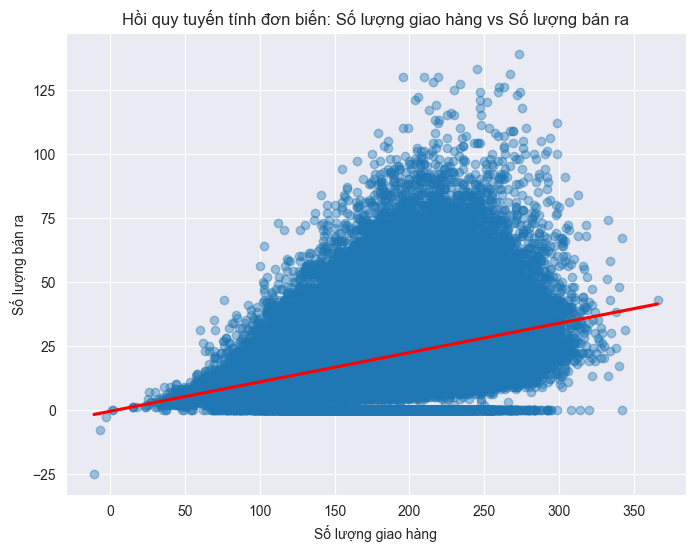

In [172]:
# Vẽ Regression Plot
plt.figure(figsize=(8,6))
sns.regplot(
    x=df['delivered_qty'],
    y=df['units_sold'],
    scatter_kws={'alpha':0.4},   # độ trong suốt điểm
    line_kws={'color':'red'}     # đường hồi quy màu đỏ
)
plt.xlabel("Số lượng giao hàng")
plt.ylabel("Số lượng bán ra")
plt.title("Hồi quy tuyến tính đơn biến: Số lượng giao hàng vs Số lượng bán ra")
plt.show()

In [173]:
# Thử với đa biến
X_multi = df[['price_unit','promotion_flag','stock_available','delivered_qty','delivery_days']]
y_multi = df['units_sold']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Xây dựng mô hình hồi quy tuyến tính đa biến
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

# Dự báo
y_pred_multi = model_multi.predict(X_test)

# Đánh giá
print("Hệ số (coefficients):", model_multi.coef_)
print("Intercept:", model_multi.intercept_)
print("R2:", r2_score(y_test, y_pred_multi))
print("MSE:", mean_squared_error(y_test, y_pred_multi))

Hệ số (coefficients): [-1.02931860e-02  1.66944950e+01  1.29238521e-01  1.27518572e-03
  1.54184722e-02]
Intercept: -3.173701650915106
R2: 0.5894530266475029
MSE: 57.09212617452911


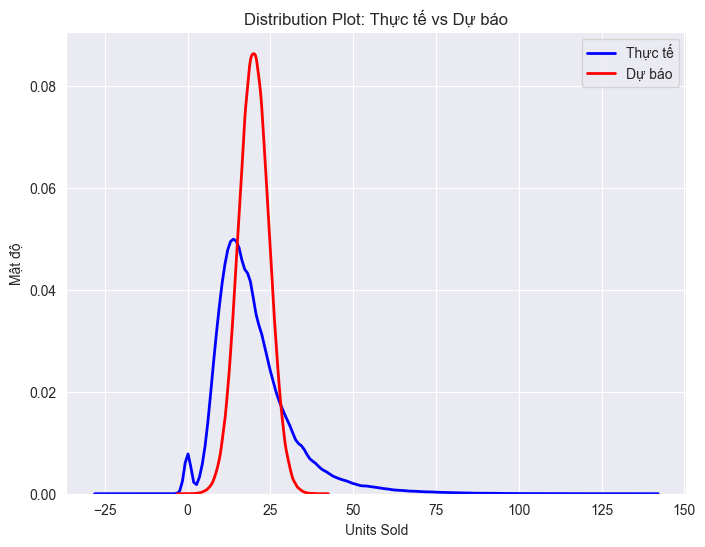

In [174]:
# So sánh thực tế vs dự báo
plt.figure(figsize=(8,6))
sns.kdeplot(df['units_sold'], color="blue", label="Thực tế", linewidth=2)
sns.kdeplot(y_pred_uni, color="red", label="Dự báo", linewidth=2)
plt.xlabel("Units Sold")
plt.ylabel("Mật độ")
plt.title("Distribution Plot: Thực tế vs Dự báo")
plt.legend()
plt.show()

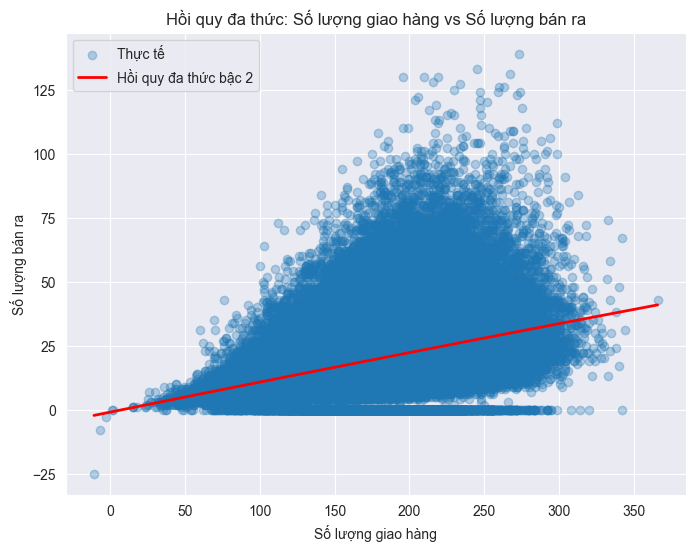

In [175]:
# Hồi quy đa thức
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X2 = df[['delivered_qty']]
y2 = df['units_sold']

# Biến đổi thành đa thức bậc 2
X_poly = poly.fit_transform(X2)

# Huấn luyện mô hình
poly_model = LinearRegression()
poly_model.fit(X_poly, y2)

# Dự báo
y_pred_poly = poly_model.predict(X_poly)

# Vẽ biểu đồ
plt.figure(figsize=(8,6))
plt.scatter(X, y, alpha=0.3, label="Thực tế")
# Sắp xếp dữ liệu để vẽ đường cong mượt hơn
sort_idx = np.argsort(X.values.flatten())
plt.plot(X.values.flatten()[sort_idx], y_pred_poly[sort_idx], color='red', linewidth=2, label="Hồi quy đa thức bậc 2")
plt.xlabel("Số lượng giao hàng")
plt.ylabel("Số lượng bán ra")
plt.legend()
plt.title("Hồi quy đa thức: Số lượng giao hàng vs Số lượng bán ra")
plt.show()

In [176]:
# Lấy nhiều biến đầu vào
X_multi = df[['delivered_qty','stock_available','price_unit']]
y = df['units_sold']

# Biến đổi thành đa thức bậc 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_multi)

# Huấn luyện
poly_model_multi = LinearRegression()
poly_model_multi.fit(X_poly, y)

# Dự báo
y_pred_poly_multi = poly_model_multi.predict(X_poly)

# Đánh giá
from sklearn.metrics import mean_squared_error, r2_score
print("R2:", r2_score(y, y_pred_poly_multi))
print("MSE:", mean_squared_error(y, y_pred_poly_multi))


R2: 0.33685258360757386
MSE: 91.86845038359455


In [177]:
# pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
X = df.drop(columns=["units_sold", "date"])
y = df["units_sold"]
num_cols = ["price_unit", "delivery_days", "stock_available", "delivered_qty", "promotion_flag"]
cat_cols = ["sku", "brand", "segment", "category", "channel", "region", "pack_type"]
# Thiết lập bộ tiền xử lý
preprocessor = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), num_cols),                      # chuẩn hoá Min-Max
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols) # one-hot encoding
    ]
)

# Chia tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo pipeline với Linear Regression
linreg_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

linreg_model.fit(X_train, y_train)
y_pred_lr = linreg_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print(f" R²   : {r2_lr:.4f}")
print(f" MSE  : {mse_lr:.2f}")
print(f" RMSE : {rmse_lr:.2f}")
print(f" MAE  : {mae_lr:.2f}")


Linear Regression:
 R²   : 0.6144
 MSE  : 53.62
 RMSE : 7.32
 MAE  : 5.19


##### Kết quả: Mô hình Linear Regression với pipeline cho kết quả khá tốt, R² = 0.61, RMSE = 7.32